In [1]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
from talib import abstract
import seaborn as sns
from bs4 import BeautifulSoup
import os
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
from selenium.webdriver.chrome.service import Service as ChromeService
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.chrome.options import Options
import time
import difflib

In [2]:
# get category index
headers = {
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}
industry_cat = "光電業"
industry_cat.encode('utf-8')
res = requests.get(f'https://goodinfo.tw/tw/StockList.asp?MARKET_CAT=%E5%85%A8%E9%83%A8&INDUSTRY_CAT={industry_cat}&SHEET=%E4%BA%A4%E6%98%93%E7%8B%80%E6%B3%81&SHEET2=%E6%97%A5&RPT_TIME=%E6%9C%80%E6%96%B0%E8%B3%87%E6%96%99', headers = headers)
res.encoding = 'utf-8'
res.text

bs = BeautifulSoup(res.text, 'html.parser')
table = bs.find('table', id = 'tblStockList')
# print(table)

index_portions_df = pd.read_html(table.prettify())
index_portions_df.index

C:\Users\James Lee\AppData\Local\Temp\ipykernel_12732\2617640563.py:15: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(table.prettify())


<function list.index(value, start=0, stop=9223372036854775807, /)>

In [3]:
company_name_list = index_portions_df[0][["代號", "名稱"]]
company_name_list

stock_number_list = index_portions_df[0]["代號"].to_list()
for i in stock_number_list:
    if i == '代號':
        stock_number_list.remove(i)
stock_number_list

['2323',
 '2349',
 '2374',
 '2393',
 '2406',
 '2409',
 '2426',
 '2429',
 '2438',
 '2466',
 '2486',
 '2489',
 '2491',
 '3008',
 '3019',
 '3024',
 '3031',
 '3038',
 '3049',
 '3050',
 '3051',
 '3059',
 '3066',
 '3128',
 '3149',
 '3230',
 '3297',
 '3339',
 '3356',
 '3362',
 '3406',
 '3434',
 '3437',
 '3441',
 '3454',
 '3455',
 '3481',
 '3490',
 '3504',
 '3516',
 '3523',
 '3531',
 '3535',
 '3543',
 '3563',
 '3576',
 '3591',
 '3615',
 '3622',
 '3623',
 '3630',
 '3666',
 '3673',
 '3691',
 '3714',
 '4729',
 '4933',
 '4934',
 '4935',
 '4942',
 '4956',
 '4960',
 '4972',
 '4976',
 '4995',
 '5220',
 '5230',
 '5234',
 '5243',
 '5244',
 '5245',
 '5251',
 '5315',
 '5371',
 '5392',
 '5432',
 '5443',
 '5484',
 '6116',
 '6120',
 '6125',
 '6164',
 '6167',
 '6168',
 '6176',
 '6209',
 '6222',
 '6225',
 '6226',
 '6234',
 '6244',
 '6246',
 '6278',
 '6405',
 '6419',
 '6443',
 '6456',
 '6477',
 '6517',
 '6556',
 '6560',
 '6668',
 '6706',
 '6742',
 '6859',
 '6916',
 '7402',
 '8049',
 '8064',
 '8069',
 '8104',
 

In [4]:
def crawl_index(date):
    
    r = requests.post('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date=' + str(date).split(' ')[0].replace('-','') + '&type=IND')
    
    csv_data = StringIO(r.text)
    ret = pd.read_csv(csv_data, header=None, skiprows=1)
    
    ret = ret.drop(ret.index[268:])    # need fine tune
    
    ret.reset_index()
    ret = ret.iloc[:, :-1]
    ret.columns = ret.iloc[0]
    ret = ret.drop(0)
    
    return ret


index_df = crawl_index(datetime.datetime.now() - datetime.timedelta(days = 1))
index_df_dict = index_df["指數"].to_dict()

In [5]:
data_index = {}
n_days = 10
date = datetime.datetime.now()
fail_count = 0
allow_continuous_fail_count = 5

while len(data_index) < n_days:

    print('parsing', date)
    # 使用 crawPrice 爬資料
    try:
        # 抓資料
        data_index[date.date()] = crawl_index(date)
        print('success!')
        fail_count = 0
    except:
        # 假日爬不到
        print('fail! check the date is holiday')
        fail_count += 1
        if fail_count == allow_continuous_fail_count:
            raise
            break
    
    # 減一天
    date -= datetime.timedelta(days=1)
    # time.sleep(5)

parsing 2024-03-16 15:44:08.888649
fail! check the date is holiday
parsing 2024-03-15 15:44:08.888649
success!
parsing 2024-03-14 15:44:08.888649
success!
parsing 2024-03-13 15:44:08.888649
success!
parsing 2024-03-12 15:44:08.888649
success!
parsing 2024-03-11 15:44:08.888649
success!
parsing 2024-03-10 15:44:08.888649
fail! check the date is holiday
parsing 2024-03-09 15:44:08.888649
fail! check the date is holiday
parsing 2024-03-08 15:44:08.888649
success!
parsing 2024-03-07 15:44:08.888649
success!
parsing 2024-03-06 15:44:08.888649
success!
parsing 2024-03-05 15:44:08.888649
success!
parsing 2024-03-04 15:44:08.888649
success!


<Axes: >

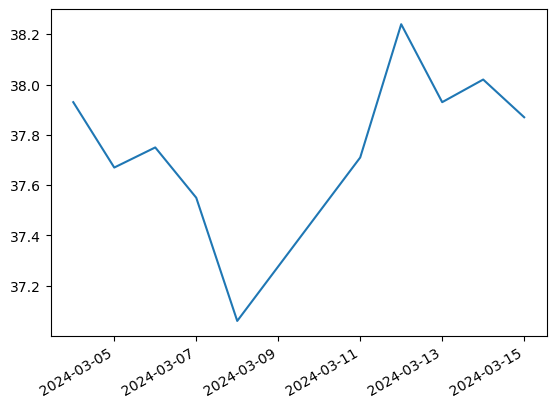

In [6]:
_index_close = pd.DataFrame({k:d['收盤指數'] for k,d in data_index.items()}).transpose()
_index_close.index = pd.to_datetime(_index_close.index)
_index_close = _index_close.rename(columns=index_df_dict)
_index_close

category_index_name = "光電類指數"
_index_close = pd.concat([_index_close[category_index_name]['2024'], _index_close[category_index_name]['2023']])

Index_Abstract = {
    'close':_index_close.dropna().astype(float),
}

Index_Abstract['close'].plot()

len: 9
price change in percentage: [0.3960918933192651, -0.2367175170962741, 0.817295017136837, -1.3859832635983294, -1.7236807212940828, 1.3221802482460736, 0.5326231691078638, -0.21192052980131998, 0.6902044066896681]




C:\Users\James Lee\.conda\envs\ta-lib\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


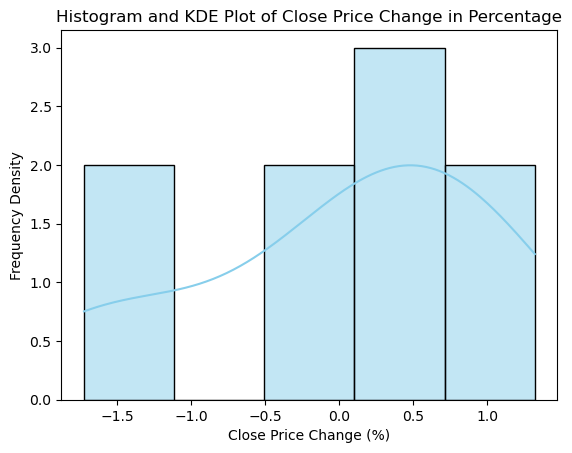

Standard Deviation of Daily Close Price Changes 0.9615734714746136  %


In [7]:
# category_index_price price change in percentage standard deviance

def calculate_standard_deviance(close_prices):
    
    price_changes_percentage = [(price - close_prices[i-1]) / close_prices[i-1] * 100 for i, price in enumerate(close_prices)][1:]
    
    print(f"len: {len(price_changes_percentage)}", end='\n')
    print(f"price change in percentage: {price_changes_percentage}", end='\n\n\n')
    
    sns.histplot(price_changes_percentage, kde=True, color='skyblue')
    plt.title('Histogram and KDE Plot of Close Price Change in Percentage')
    plt.xlabel('Close Price Change (%)')
    plt.ylabel('Frequency Density')
    plt.show()
    
    std_dev_price_changes_percentage = np.std(price_changes_percentage)
    
    print(f"Standard Deviation of Daily Close Price Changes {std_dev_price_changes_percentage}  %", end="\n")

calculate_standard_deviance(Index_Abstract['close'].to_numpy())

In [8]:
headers = {
  'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/107.0.0.0 Safari/537.36'
}
stock_num = "3406"
url = f"https://goodinfo.tw/tw/StockFinDetail.asp?RPT_CAT=XX_M_QUAR_ACC&STOCK_ID={stock_num}"
res = requests.get(url, headers = headers)
res.encoding = 'utf-8'
res.text

bs = BeautifulSoup(res.text, 'html.parser')
table = bs.find('table', id = 'tblFinDetail')

index_portions_df = pd.read_html(table.prettify())
index_portions_df

C:\Users\James Lee\AppData\Local\Temp\ipykernel_12732\3339060390.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(table.prettify())


[              獲利能力 2023Q4 2023Q3 2023Q2 2023Q1 2022Q4 2022Q3 2022Q2 2022Q1  \
 0            營業毛利率  35.67  33.31  30.74  31.24  39.92   38.3  34.04  31.03   
 1            營業利益率  19.06  15.51    1.6   7.12  20.44  19.14   9.31  10.21   
 2            稅前淨利率  20.75  19.18   6.99   9.56  22.85  24.13  13.66  13.63   
 3            稅後淨利率  14.23     13   5.95   7.19  16.97  18.07  11.22   9.71   
 4     稅後淨利率  (母公司)  14.18  12.92   5.83   7.13  17.04  18.03  11.12   9.65   
 ..             ...    ...    ...    ...    ...    ...    ...    ...    ...   
 105        長期資金適合率  123.7  116.2  116.7  120.5  131.7    134  126.3  130.1   
 106     所得稅佔稅前淨利比率  31.41   32.2  14.91  24.78  25.71  25.13  17.86  28.74   
 107      業外損益佔營收比率   1.69   3.67    5.4   2.44    2.4   4.98   4.35   3.43   
 108    業外損益佔稅前淨利比率   8.15  19.15  77.18   25.5  10.51  20.66  31.86  25.14   
 109  財報評分 (100為滿分)     60     51     49     51     57     53     47     55   
 
     2021Q4 2021Q3  
 0    35.36  34.84  
 1    18

In [9]:
index_portions_df[0]

,獲利能力,2023Q4,2023Q3,2023Q2,2023Q1,2022Q4,2022Q3,2022Q2,2022Q1,2021Q4,2021Q3
0,營業毛利率,35.67,33.31,30.74,31.24,39.92,38.3,34.04,31.03,35.36,34.84
1,營業利益率,19.06,15.51,1.6,7.12,20.44,19.14,9.31,10.21,18.02,16.36
2,稅前淨利率,20.75,19.18,6.99,9.56,22.85,24.13,13.66,13.63,19.02,17.55
3,稅後淨利率,14.23,13,5.95,7.19,16.97,18.07,11.22,9.71,13.63,12.47
4,稅後淨利率 (母公司),14.18,12.92,5.83,7.13,17.04,18.03,11.12,9.65,13.72,12.46
...,...,...,...,...,...,...,...,...,...,...,...
105,長期資金適合率,123.7,116.2,116.7,120.5,131.7,134,126.3,130.1,134,131.5
106,所得稅佔稅前淨利比率,31.41,32.2,14.91,24.78,25.71,25.13,17.86,28.74,28.32,28.94
107,業外損益佔營收比率,1.69,3.67,5.4,2.44,2.4,4.98,4.35,3.43,1,1.19
108,業外損益佔稅前淨利比率,8.15,19.15,77.18,25.5,10.51,20.66,31.86,25.14,5.26,6.78


In [10]:
index_portions_df[0].columns[-1:][0]

'2021Q3'

In [11]:
select_tag = bs.find('select', id="RPT_CAT")
options_for_financial_statements = [option['value'] for option in select_tag.find_all('option')]

select_tag = bs.find('select', id="QRY_TIME")
options_for_year = [option.text for option in select_tag.find_all('option')]

print(f"financial_statements: {options_for_financial_statements}", end='\n')
print(f"options_for_year: {options_for_year}", end='\n')

financial_statements: ['XX_M_QUAR', 'XX_M_QUAR_ACC', 'XX_M_YEAR', 'XX_M_Y4Q', 'XX_QUAR', 'XX_QUAR_ACC', 'XX_YEAR', 'XX_Y4Q']
options_for_year: ['2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4', '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1', '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3', '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1', '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3', '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1', '2010Q4', '2010Q3', '2010Q2', '2010Q1', '2009Q4', '2009Q3', '2009Q2', '2009Q1', '2008Q4', '2008Q3', '2008Q2', '2008Q1', '2007Q4', '2007Q3', '2007Q2', '2007Q1', '2006Q4', '2006Q2', '2005Q4', '2005Q2', '2004Q4', '2003Q4']


In [12]:
driver = webdriver.Chrome()
driver.get(url)

page_source_1 = driver.page_source

soup = BeautifulSoup(page_source_1, 'html.parser')
desired_table_1 = soup.find('table', {'id': 'tblFinDetail'})
index_portions_df = pd.read_html(desired_table_1.prettify())
print(index_portions_df[0])

select_element = driver.find_element_by_id('RPT_CAT')

select = Select(select_element)

current_value = select.first_selected_option.get_attribute("value")
print(f"1: current_value: {current_value}")

#wait = driver.implicitly_wait(10)
#select.select_by_value('XX_M_YEAR')
time.sleep(10)


current_value = select.first_selected_option.get_attribute("value")
print(f"2: current_value: {current_value}")

#onchange_attribute = select_element.get_attribute("onchange")
#if onchange_attribute:
#   driver.execute_script(onchange_attribute)
    
#wait = WebDriverWait(driver, 5)
#wait.until(EC.presence_of_element_located((By.ID, 'txtFinBody')))

page_source_2 = driver.page_source
soup = BeautifulSoup(page_source_2, 'html.parser')
desired_table_2 = soup.find('table', {'id': 'tblFinDetail'})
index_portions_df = pd.read_html(desired_table_2.prettify())
print(index_portions_df[0])

C:\Users\James Lee\AppData\Local\Temp\ipykernel_12732\3021577051.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(desired_table_1.prettify())


              獲利能力 2023Q4 2023Q3 2023Q2 2023Q1 2022Q4 2022Q3 2022Q2 2022Q1  \
0            營業毛利率  35.67  33.31  30.74  31.24  39.92   38.3  34.04  31.03   
1            營業利益率  19.06  15.51    1.6   7.12  20.44  19.14   9.31  10.21   
2            稅前淨利率  20.75  19.18   6.99   9.56  22.85  24.13  13.66  13.63   
3            稅後淨利率  14.23     13   5.95   7.19  16.97  18.07  11.22   9.71   
4     稅後淨利率  (母公司)  14.18  12.92   5.83   7.13  17.04  18.03  11.12   9.65   
..             ...    ...    ...    ...    ...    ...    ...    ...    ...   
105        長期資金適合率  123.7  116.2  116.7  120.5  131.7    134  126.3  130.1   
106     所得稅佔稅前淨利比率  31.41   32.2  14.91  24.78  25.71  25.13  17.86  28.74   
107      業外損益佔營收比率   1.69   3.67    5.4   2.44    2.4   4.98   4.35   3.43   
108    業外損益佔稅前淨利比率   8.15  19.15  77.18   25.5  10.51  20.66  31.86  25.14   
109  財報評分 (100為滿分)     60     51     49     51     57     53     47     55   

    2021Q4 2021Q3  
0    35.36  34.84  
1    18.02  16.36  
2  

C:\Users\James Lee\AppData\Local\Temp\ipykernel_12732\3021577051.py:36: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(desired_table_2.prettify())


In [13]:
driver = webdriver.Chrome()
driver.get(url)

page_source_1 = driver.page_source

soup = BeautifulSoup(page_source_1, 'html.parser')
desired_table_1 = soup.find('table', {'id': 'tblFinDetail'})
index_portions_df = pd.read_html(desired_table_1.prettify())
print(index_portions_df[0])

"""
select_element = driver.find_element_by_id('RPT_CAT')
select = Select(select_element)
current_value = select.first_selected_option.get_attribute("value")
print(f"1: current_value: {current_value}")
#wait = driver.implicitly_wait(10)
select.select_by_value('XX_M_YEAR')
current_value = select.first_selected_option.get_attribute("value")
print(f"2: current_value: {current_value}")

onchange_attribute = select_element.get_attribute("onchange")
if onchange_attribute:
    driver.execute_script(onchange_attribute)
    
wait = WebDriverWait(driver, 5)
wait.until(EC.presence_of_element_located((By.ID, 'txtFinBody')))
"""


              獲利能力 2023Q4 2023Q3 2023Q2 2023Q1 2022Q4 2022Q3 2022Q2 2022Q1  \
0            營業毛利率  35.67  33.31  30.74  31.24  39.92   38.3  34.04  31.03   
1            營業利益率  19.06  15.51    1.6   7.12  20.44  19.14   9.31  10.21   
2            稅前淨利率  20.75  19.18   6.99   9.56  22.85  24.13  13.66  13.63   
3            稅後淨利率  14.23     13   5.95   7.19  16.97  18.07  11.22   9.71   
4     稅後淨利率  (母公司)  14.18  12.92   5.83   7.13  17.04  18.03  11.12   9.65   
..             ...    ...    ...    ...    ...    ...    ...    ...    ...   
105        長期資金適合率  123.7  116.2  116.7  120.5  131.7    134  126.3  130.1   
106     所得稅佔稅前淨利比率  31.41   32.2  14.91  24.78  25.71  25.13  17.86  28.74   
107      業外損益佔營收比率   1.69   3.67    5.4   2.44    2.4   4.98   4.35   3.43   
108    業外損益佔稅前淨利比率   8.15  19.15  77.18   25.5  10.51  20.66  31.86  25.14   
109  財報評分 (100為滿分)     60     51     49     51     57     53     47     55   

    2021Q4 2021Q3  
0    35.36  34.84  
1    18.02  16.36  
2  

C:\Users\James Lee\AppData\Local\Temp\ipykernel_12732\701442098.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(desired_table_1.prettify())


'\nselect_element = driver.find_element_by_id(\'RPT_CAT\')\nselect = Select(select_element)\ncurrent_value = select.first_selected_option.get_attribute("value")\nprint(f"1: current_value: {current_value}")\n#wait = driver.implicitly_wait(10)\nselect.select_by_value(\'XX_M_YEAR\')\ncurrent_value = select.first_selected_option.get_attribute("value")\nprint(f"2: current_value: {current_value}")\n\nonchange_attribute = select_element.get_attribute("onchange")\nif onchange_attribute:\n    driver.execute_script(onchange_attribute)\n    \nwait = WebDriverWait(driver, 5)\nwait.until(EC.presence_of_element_located((By.ID, \'txtFinBody\')))\n'

In [14]:
select_element = driver.find_element_by_id('RPT_CAT')
select = Select(select_element)
select.select_by_value('XX_M_YEAR')

time.sleep(10)

page_source_2 = driver.page_source
soup = BeautifulSoup(page_source_2, 'html.parser')
desired_table_2 = soup.find('table', {'id': 'tblFinDetail'})
index_portions_df = pd.read_html(desired_table_2.prettify())
print(index_portions_df[0])

             獲利能力   2023   2022   2021   2020   2019   2018    2017    2016  \
0           營業毛利率  35.67  39.92  35.36  43.46  46.95  38.75   40.85   24.85   
1           營業利益率  19.06  20.44  18.02  28.67  28.03  15.67   19.22    2.25   
2           稅前淨利率  20.75  22.85  19.02  26.95  29.27  15.62   16.18   -2.12   
3           稅後淨利率  14.23  16.97  13.63  19.13  20.95  11.41   12.91   -2.43   
4    稅後淨利率  (母公司)  14.18  17.04  13.72  19.22  20.94  11.82   13.08   -2.19   
..            ...    ...    ...    ...    ...    ...    ...     ...     ...   
83        長期資金適合率  123.7  131.7    134    141  195.6  146.4  125.50   105.4   
84     所得稅佔稅前淨利比率  31.41  25.71  28.32  29.04  28.43  26.92   20.25  -14.19   
85      業外損益佔營收比率   1.69    2.4      1  -1.72   1.24  -0.05   -3.04   -4.37   
86    業外損益佔稅前淨利比率   8.15  10.51   5.26  -6.36   4.23  -0.33  -18.78   205.9   
87  財報評分 (100為滿分)     60     57     57     70     74     55   53.00      36   

      2015   2014    2013    2012  
0     8.07   9.

C:\Users\James Lee\AppData\Local\Temp\ipykernel_12732\3587874477.py:10: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  index_portions_df = pd.read_html(desired_table_2.prettify())


In [15]:
type(page_source_2)

str

In [16]:
import difflib

def print_difference(string1, string2):
    differ = difflib.Differ()
    diff = differ.compare(string1.splitlines(), string2.splitlines())
    print('\n'.join(diff))

print_difference(page_source_1, page_source_2)

  <html lang="zh-Hant"><head>
  
  <meta charset="UTF-8">
  <meta name="viewport" content="width=device-width">
  
- <meta name="description" content="(3406)玉晶光 2023年 第4季 累季財務比率表 (合併)"><title>(3406)玉晶光 2023年 第4季 累季財務比率表 (合併) - Goodinfo!台灣股市資訊網</title>
?                                                                                            ^^^^^^

+ <meta name="description" content="(3406)玉晶光 2023年 第4季 累季財務比率表 (合併)"><title>(3406)玉晶光 2023年 年度財務比率表 (合併) - Goodinfo!台灣股市資訊網</title>
?                                                                                            ^^

  
  <link rel="canonical" href="https://goodinfo.tw/tw/StockFinDetail.asp?RPT_CAT=XX%5FM%5FQUAR%5FACC&amp;STOCK_ID=3406&amp;QRY_TIME=20234">
  <link rel="icon" href="image/Goodinfo.ico">
  <link rel="stylesheet" type="text/css" href="../Library/css/Standard.css?45065.8419907407">
  <link rel="stylesheet" type="text/css" href="../Library/css/Public.css?45339.918287037">
  
  <script src="https://pagead2.googlesynd

In [17]:
chrome_options = webdriver.ChromeOptions()
prefs = {'download.default_directory': 'C:\\Users\\James Lee\\Downloads'}
chrome_options.add_experimental_option('prefs', prefs)
driver = webdriver.Chrome(options=chrome_options)

driver.get(url)

button = driver.find_element(By.XPATH, f'//input[@value="HTML"]')

button.click()

time.sleep(5)

file_path = 'C:\\Users\\James Lee\\Downloads\\FinDetail.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()
print(html_content)
"""
soup = BeautifulSoup(html_content, 'html.parser')

table = bs.find('table', id = 'tblFinDetail')
index_portions_df = pd.read_html(table.prettify())
index_portions_df
"""
if os.path.exists(file_path):
    # os.remove(file_path)
    print(f"File '{file_path}' has been deleted.")
else:
    print(f"File '{file_path}' does not exist.")

﻿<!doctype html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html lang="zh-Hant"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width"><link rel="stylesheet" type="text/css" href="https://goodinfo.tw/Library/css/Standard.css?1710573808362"/><link rel="stylesheet" type="text/css" href="https://goodinfo.tw/Library/css/Public.css?1710573808362"/></head><body><table id="tblFinDetail" class="b1 p4_4 r0_10 row_mouse_over" style="width:100%;font-size:11pt;line-height:20px;"><tbody><tr class="bg_h1 fw_normal" style="text-align:center;"><th style="color:blue;width:25%;"><nobr>獲利能力</nobr></th><th><nobr>2023</nobr></th><th><nobr>2022</nobr></th><th><nobr>2021</nobr></th><th><nobr>2020</nobr></th><th><nobr>2019</nobr></th><th><nobr>2018</nobr></th><th><nobr>2017</nobr></th><th><nobr>2016</nobr></th><th><nobr>2015</nobr></th><th><nobr>2014</nobr></th><th><nobr>2013</nobr></th><th><nobr>2012</nobr></th></tr><tr bg

In [19]:
select_element = driver.find_element_by_id('RPT_CAT')

select = Select(select_element)
select.select_by_value('XX_M_YEAR')
onchange_attribute = select_element.get_attribute("onchange")
if onchange_attribute:
    driver.execute_script(onchange_attribute)

"""
current_value = select.first_selected_option.get_attribute("value")
print(f"1: current_value: {current_value}")

wait = driver.implicitly_wait(10)
select.select_by_value('XX_M_YEAR')

current_value = select.first_selected_option.get_attribute("value")
print(f"2: current_value: {current_value}")
"""

button = driver.find_element(By.XPATH, f'//input[@value="HTML"]')
button.click()

time.sleep(5)

file_path = 'C:\\Users\\James Lee\\Downloads\\FinDetail.html'

with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

print(html_content)
"""
soup = BeautifulSoup(html_content, 'html.parser')

table = bs.find('table', id = 'tblFinDetail')
index_portions_df = pd.read_html(table.prettify())
index_portions_df
"""
if os.path.exists(file_path):
    # os.remove(file_path)
    print(f"File '{file_path}' has been deleted.")
else:
    print(f"File '{file_path}' does not exist.")


﻿<!doctype html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html lang="zh-Hant"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width"><link rel="stylesheet" type="text/css" href="https://goodinfo.tw/Library/css/Standard.css?1710573808362"/><link rel="stylesheet" type="text/css" href="https://goodinfo.tw/Library/css/Public.css?1710573808362"/></head><body><table id="tblFinDetail" class="b1 p4_4 r0_10 row_mouse_over" style="width:100%;font-size:11pt;line-height:20px;"><tbody><tr class="bg_h1 fw_normal" style="text-align:center;"><th style="color:blue;width:25%;"><nobr>獲利能力</nobr></th><th><nobr>2023</nobr></th><th><nobr>2022</nobr></th><th><nobr>2021</nobr></th><th><nobr>2020</nobr></th><th><nobr>2019</nobr></th><th><nobr>2018</nobr></th><th><nobr>2017</nobr></th><th><nobr>2016</nobr></th><th><nobr>2015</nobr></th><th><nobr>2014</nobr></th><th><nobr>2013</nobr></th><th><nobr>2012</nobr></th></tr><tr bg

In [20]:
file_path = 'C:\\Users\\James Lee\\Downloads\\FinDetail.html'

del html_content
with open(file_path, 'r', encoding='utf-8') as file:
    html_content = file.read()

print(html_content)

﻿<!doctype html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"><html lang="zh-Hant"><head><meta charset="UTF-8"><meta name="viewport" content="width=device-width"><link rel="stylesheet" type="text/css" href="https://goodinfo.tw/Library/css/Standard.css?1710573808362"/><link rel="stylesheet" type="text/css" href="https://goodinfo.tw/Library/css/Public.css?1710573808362"/></head><body><table id="tblFinDetail" class="b1 p4_4 r0_10 row_mouse_over" style="width:100%;font-size:11pt;line-height:20px;"><tbody><tr class="bg_h1 fw_normal" style="text-align:center;"><th style="color:blue;width:25%;"><nobr>獲利能力</nobr></th><th><nobr>2023</nobr></th><th><nobr>2022</nobr></th><th><nobr>2021</nobr></th><th><nobr>2020</nobr></th><th><nobr>2019</nobr></th><th><nobr>2018</nobr></th><th><nobr>2017</nobr></th><th><nobr>2016</nobr></th><th><nobr>2015</nobr></th><th><nobr>2014</nobr></th><th><nobr>2013</nobr></th><th><nobr>2012</nobr></th></tr><tr bg